# Find out Missing values and cleaning the data


In [14]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno  # THIS LIBRARY IS RELATED TO MISSING VALUES 

# TO READ THE DATA:- WE MUST FOLLOW THESE THREE STEPS
# 1.HEAD() 2.INFO() 3. DESCRIBE()

In [3]:
#IMPORT TITANIC DATASET
tt = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Titanic.csv')
tt

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
tt.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
tt.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [17]:
tt.isnull().sum() # both isna() & isnull() having same function work

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [18]:
tt.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

#There are mainly 3 operation to see missing values
#1.Bar chart:- Here we got missing values in the form of percentage(%)
#2.Matrix chart:- here we got issing values in the form of blocks
#3.Heatmap:- Here we got missing values by using corealtion

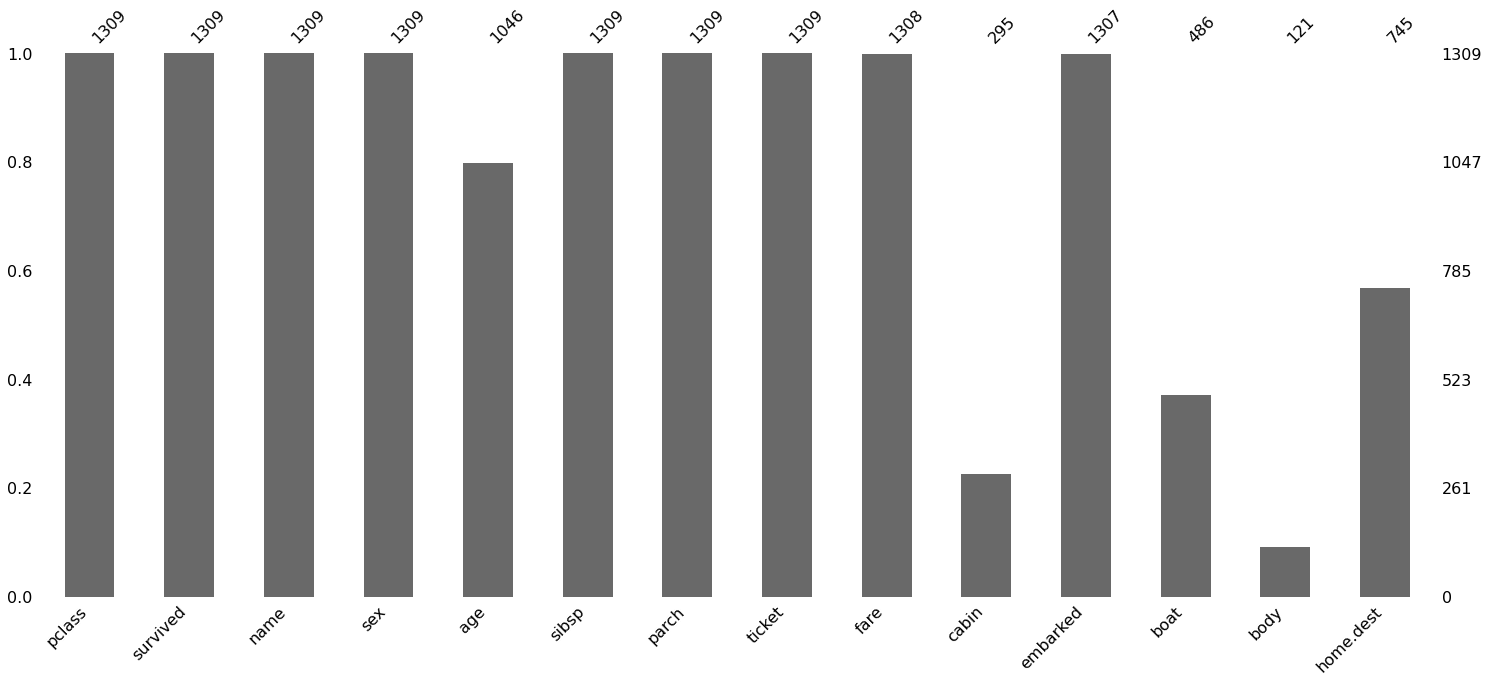

In [19]:
# Using Bar chart/ find missing values
msno.bar(tt)

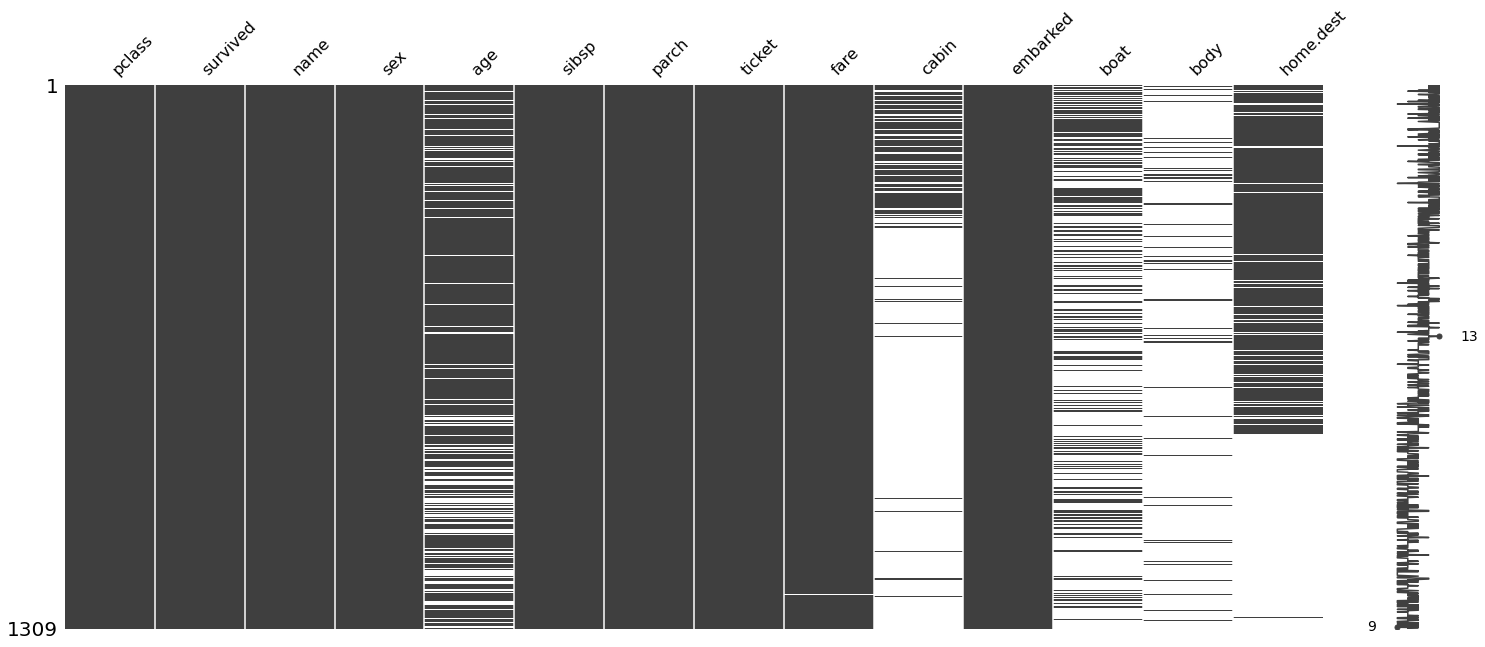

In [20]:
msno.matrix(tt)

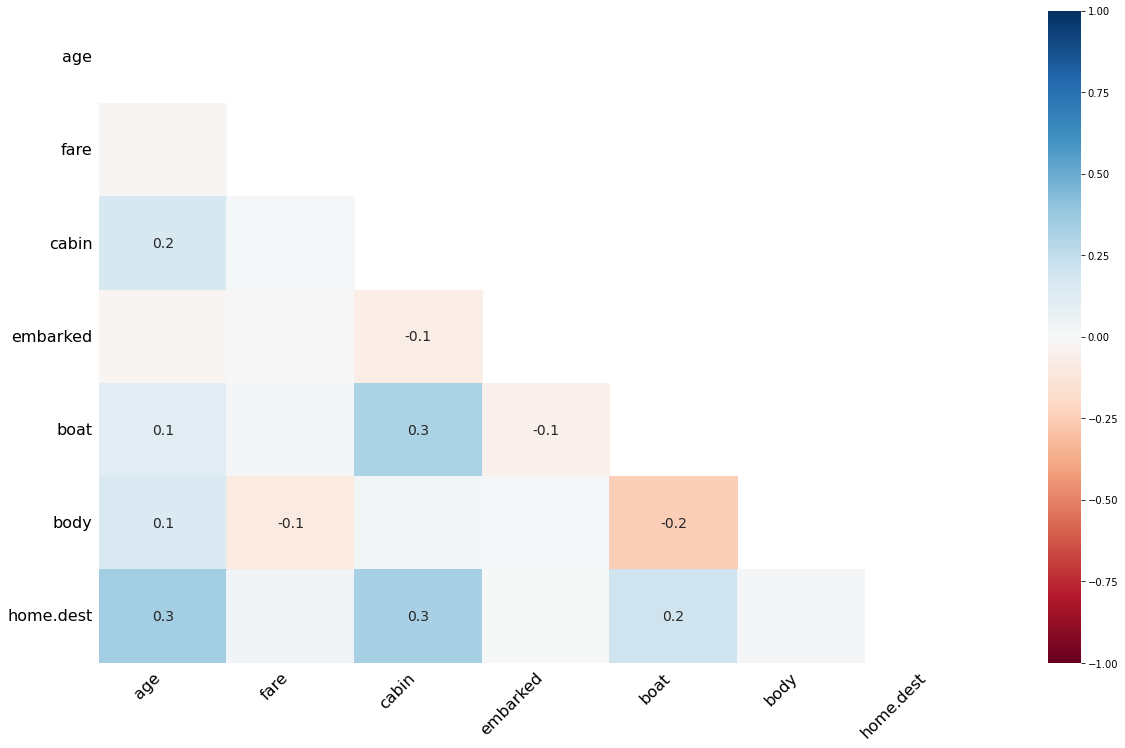

In [21]:
msno.heatmap(tt)

# TILL NOW WE GOT THE MISSING VALUES WITH DIFFERENT FORMAT
# Now we have to drop/ignor/fill the missing values
# for this we have to use dropna() and fillna()

#  Using dropna() - It delete the all  rows and columns having any missing values // Bydefault it takes all rows


In [39]:
tt.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [22]:
tt.dropna()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [23]:
tt.dropna(axis=1) # it delete all columns which having missing values( when we use axis=1 then it's only consider the columns which having missing values)

,pclass,survived,name,sex,sibsp,parch,ticket
0,1,1,"Allen, Miss. Elisabeth Walton",female,0,0,24160
1,1,1,"Allison, Master. Hudson Trevor",male,1,2,113781
2,1,0,"Allison, Miss. Helen Loraine",female,1,2,113781
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,1,2,113781
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1,2,113781
...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,1,0,2665
1305,3,0,"Zabour, Miss. Thamine",female,1,0,2665
1306,3,0,"Zakarian, Mr. Mapriededer",male,0,0,2656
1307,3,0,"Zakarian, Mr. Ortin",male,0,0,2670


# But in dropna() chance to more loss of information. it's not best stretegy while we work with big data.
 
 # it's applicable only where missing values is 2,4,6.

In [25]:
tt.dropna(thresh=12)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,3,0,"Olsvigen, Mr. Thor Anderson",male,20.00,0,0,6563,9.2250,NaN,S,NaN,89.0,"Oslo, Norway Cameron, WI"
1131,3,1,"Pickard, Mr. Berk (Berk Trembisky)",male,32.00,0,0,SOTON/O.Q. 392078,8.0500,E10,S,9,NaN,NaN
1187,3,1,"Sandstrom, Miss. Beatrice Irene",female,1.00,1,1,PP 9549,16.7000,G6,S,13,NaN,NaN
1188,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.00,0,2,PP 9549,16.7000,G6,S,13,NaN,NaN


# Different ways to fill the missing values
# 1. fillna() - to fill any constant values 
#             - to fill with avg. and mean

In [29]:
tt.age.fillna('a')

0       29.0
1       0.92
2        2.0
3       30.0
4       25.0
        ... 
1304    14.5
1305       a
1306    26.5
1307    27.0
1308    29.0
Name: age, Length: 1309, dtype: object

In [34]:
tt.cabin.fillna(56) # to fill a coonstant values

0            B5
1       C22 C26
2       C22 C26
3       C22 C26
4       C22 C26
         ...   
1304         56
1305         56
1306         56
1307         56
1308         56
Name: cabin, Length: 1309, dtype: object

In [38]:
tt.age.fillna(tt.age.mean()) # For big data set we can apply fillna()   # to fill the avg. or mean

0       29.000000
1        0.920000
2        2.000000
3       30.000000
4       25.000000
          ...    
1304    14.500000
1305    29.881138
1306    26.500000
1307    27.000000
1308    29.000000
Name: age, Length: 1309, dtype: float64